# Digitális szűrők

Szűrés:

* sztochasztikus folyamatról (jel) a zaj leválasztása
* jel helyreállítása, torzulás megszüntetése

Az ábrán egy lineáris rendszer (szűrő) látható.

![lineáris rendszer](linsys.png "Lineáris rendszer")

A linearitás azt jelenti, hogy a rendszer (szűrő) által végzett művelet a lineáris tér műveleteivel (számmal szorzás, összeadás) *felcserélhető*.

$$ v_{1be}(t) \Rightarrow v_{1ki}(t) $$
$$ v_{2be}(t) \Rightarrow v_{2ki}(t) $$
$$ v_{1be}(t)+v_{2be}(t) \Rightarrow v_{2ki}(t)+v_{1ki}(t) $$

A digitális szűrőket a szűrő **impulzus válasz**a segítségével jellemezhetjük. Az impulzus egy igen rövid idő alatt 0-tól a maximum értékig felfutó, majd szintén nagyon gyorsan a 0 értékre visszatérő jel. Az impulzus választ az idő szerint integrálva megkapjuk a szűrő **lépcsős válasz**át. Az impulzus válasz Fourier transzformáltja adja a szűrő frekvencia tartománybeli jellemzésére szolgáló **frekvencia válasz**át. A frekvencia válasz függvényt logaritmikus (dB) skálán is ábrázolhatjuk, az alábbi összefüggés szerint ($A_{be}$ és $A_{ki}$ a bemeneti és kimeneti amplitúdók):

$$ \mathrm{dB} = 20 \log_{10}\frac{A_{ki}}{A_{be}}.$$

Ezeket a függvényeket és kapcsolatukat szemlélteti az alábbi ábra:

![válaszfüggvények](filter_char.png "a szűrő válaszfüggvényei")


## A digitális szűrők alaptípusai

A digitális szűrőket az impulzus bemeneti jelre adott válaszuk alapján így különböztetjük meg:

* Véges impulzus válasz szűrő ( **FIR** = Finite Impulse Response ), más néven mozgó átlag szűrő ( MA = Moving Average )

   - a szűrő magfüggvényével számított diszkrét *konvolúció*

* Végtelen impulzus válasz szűrő ( **IIR** = Infinite Impulse Response ), más néven autoregressziós mozgó-átlag szűrő ( ARMA = Autoregressive Moving-Average )

   - kimenet és bemenet súlyozott összege

* Nemlineáris szűrő



## A digitális szűrők jellemzői

Az **ideális** szűrők lehetővé teszik egy megadott frekvenciasáv teljes (veszteségmentes) áteresztését, míg a nem kívánt frekvenciatartomány jeleit teljes egészében (maximálisan) elnyomják. Aszerint osztályozzuk a szűrőket, hogy egy frekvenciatartomány jeleit átengedik vagy elnyomják. 



* *Aluláteresztő* szűrők:  átengedik az alacsony, és levágják a magas frekvenciájú jeleket

* *Felüláteresztő* szűrők:  átengedik a magas, és levágják az alacsony frekvenciájú jeleket

* *Sáváteresztő* szűrők :  egy bizonyos frekvenciatartomány jeleit átengedik

* *Sávvágó* szűrők:  egy bizonyos frekvencia tartomány jeleit nem engedik át

Az egyes ideális szűrők frekvencia válaszait az alábbi ábrák mutatják be:

![ideális szűrők](filter_ideal.png "ideális szűrők")

A szűrő *átviteli sáv*ja  az a frekvenciatartomány, amelyet a szűrő átenged. Az ideális szűrő erősítése az átviteli sávban 1 (amely megfelel 0 dB erősítésnek), így a jel amplitúdója sem nem növekszik sem nem csökken.

A szűrő *vágási sáv*ja az a frekvenciatartomány, amelyet a szűrő teljes egészében levág. 

A **valóságos** szűrők nem tudják teljesíteni egy ideális szűrővel szemben támasztott követelményeket. A gyakorlatban mindig van egy véges *átmeneti sáv* az átviteli és vágási sáv között. Az átmeneti sávban a szűrő erősítése fokozatosan változik.

További részletesebb információ található a digitális szűrőkkel kapcsolatban  Huba - Lipovszky: [Méréselmélet](http://moodle.autolab.uni-pannon.hu/Mecha_tananyag/mereselmelet/index.html) c. könyve [10. fejezetében](http://moodle.autolab.uni-pannon.hu/Mecha_tananyag/mereselmelet/ch10.html).

## Véges impulzus válasz (FIR) szűrők

A véges impulzus válasz (FIR) szűrők a következő műveletet végzik: 

$$ y_n = \sum_{k=0}^{M-1} h_k x_{n-k} $$

ahol $ x_n $ a valós bemenő jel és $ y_n $ az ugyancsak valós kimenő jel. Azért *véges* impulzus válasznak nevezzük mivel az input megszűnésével befejezik a működésüket (tehát nincs visszacsatolás ami miatt a működésük magától vég nélkül folytatódna). Időnként *mozgóátlag* vagy *konvolúciós* szűrőnek hívják őket. A *leágaztatás (tap)* kifejezést használják $ M $-re, tehát egy *10-leágaztatásos* szűrőnek $ M=10 $ együtthatója van. Egy kettes leágaztatásos szűrő esetében például $ h_0 = h_1 = 1/2 $, tehát

$$ y_n = x_{n}/2 + x_{n-1}/2 $$

Például $ x_n=1 \hspace{.5em} \forall n \ge 0 $ bemenetre  $ y_n = 1 \hspace{.5em} \forall n \ge 1  $ . Figyeljük meg, hogy egyel kevesebb adatunk van amikor $ n=0 $-nál indítjuk a szűrőt, ami azt jelenti, hogy még egy adatot meg kell várnunk hogy legyen érvényes kimenete a szűrőnek. Ez a szűrő  *átmeneti (tranziens)* állapota.  Egy másik példa az
 $ x_n= \exp \left( i\pi n \right)  \hspace{.5em} \forall n\ge 0 $ bemenetre az $ y_n=0 \; \forall n \ge 1  $ kimenet. Ez a két eset azt mutatja meg, hogy a szóban forgó mozgóátlag szűrés megszüntette a legmagasabb frekvenciájú, $ \omega=\pi $ összetevőt és megőrizte a legalacsonyabb frekvenciájú, $ \omega=0 $ (konstans) jel összetevőt.

Elemezzük ezt a szűrőt a `scipy.signal` modulját felhasználva.

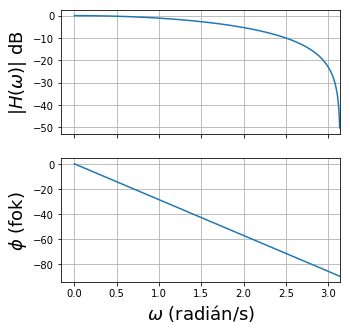

In [1]:
%matplotlib inline
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,1,sharex=True)
plt.subplots_adjust( hspace = .2 )
fig.set_size_inches((5,5))

ax=axs[0]
w,h=signal.freqz([1/2., 1/2.],1) # frekvencia válasz
ax.plot(w,20*np.log10(abs(h)))
ax.set_ylabel(r"$|H(\omega)| $ dB",fontsize=18)
ax.grid()

ax=axs[1]
ax.plot(w,np.angle(h)/np.pi*180)
ax.set_xlabel(r'$\omega$ (radián/s)',fontsize=18)
ax.set_ylabel(r"$\phi $ (fok)",fontsize=18)
ax.set_xlim(right = np.pi)
ax.grid()

Az első ábra a szűrő dB-ben kifejezett amplitúdó, a másik pedig a fokban kifejezett fázis válaszát mutatja. Az $\omega=0 $-nál $|H(\omega=0)|=1 $ (azaz 1 erősítés), amely kifejezi azt, hogy az $ \omega=0 $-nál változatlan erősségű a kimenő jel. A másik esetben $\omega= \pi $-re $|H(\omega=\pi)|=0$, vagyis az $ \omega=\pi $-re a bemenő jelet a szűrő teljesen kinullázza.

Mi történik akkor, ha kettő helyett 8 értéket átlagol a szűrő?

/home/tg/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]


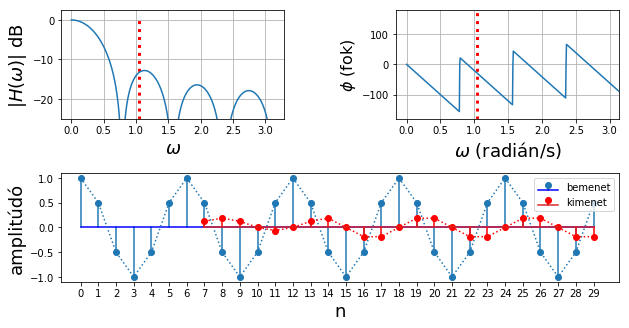

In [2]:
from matplotlib import gridspec

fig=plt.figure()
fig.set_size_inches((10,5))

gs = gridspec.GridSpec(2,2)
gs.update( wspace=0.5, hspace=0.5)

ax = fig.add_subplot(plt.subplot(gs[0,0]))

ma_length = 8 # mozgóátlag szűrő hossza
w,h=signal.freqz(np.ones(ma_length)/ma_length,1)
ax.plot(w,20*np.log10(abs(h)))
ax.set_ylabel(r"$ |H(\omega)| $ dB",fontsize=18)
ax.set_xlabel(r"$\omega$",fontsize=18)
ax.vlines(np.pi/3,-25,0,linestyles=':',color='r',lw=3.)
ax.set_ylim(bottom=-25)
ax.grid()

ax = fig.add_subplot(plt.subplot(gs[0,1]))
ax.plot(w,np.angle(h)/np.pi*180)
ax.set_xlabel(r'$\omega$ (radián/s)',fontsize=18)
ax.set_ylabel(r"$\phi $ (fok)",fontsize=16)
ax.set_xlim(right = np.pi)
ax.set_ylim(bottom=-180,top=180)
ax.vlines(np.pi/3,-180,180,linestyles=':',color='r',lw=3.)
ax.grid()

ax = fig.add_subplot(plt.subplot(gs[1,:]))
Ns=30
n= np.arange(Ns)
x = np.cos(np.arange(Ns)*np.pi/3.)
y= signal.lfilter(np.ones(ma_length)/ma_length,1,x)

ax.stem(n,x,label='bemenet',basefmt='b-')
ax.plot(n,x,':')
ax.stem(n[ma_length-1:],y[:-ma_length+1],markerfmt='ro',linefmt='r-',label='kimenet')
ax.plot(n[ma_length-1:],y[:-ma_length+1],'r:')
ax.set_xlim(left=-1.1)
ax.set_ylim(bottom=-1.1,top=1.1)
ax.set_xlabel("n",fontsize=18)
ax.set_xticks(n)
ax.legend(loc=0)
ax.set_ylabel("amplitúdó",fontsize=18);

A fölső két ábrán a szűrő amplitúdó és fázis válaszát látjuk. A fűrészfogak a fázis 180°-os ugrásait mutatják. Az alsó ábrán a be- és kimeneti jelet láthatjuk. A kimenet a szűrő hossza miatt eltolódott. Mivel a bemenő jel frekvenciája $ 2\pi/6 $, a periódusa $T=6$ minta és így hat mintánként ismétlődik. A fázis válaszból látszik, hogy ennél a frekvenciánál a fázis körülbelül 30° plusz a 180°-os ugrás, a kimenet fél mintával ($ 30/360 = 0.5/6 $) plusz 3 mintával (a 6 minta felével, $ 180/360=1/2 $) tolódik el. Az amplitúdó válasz függvénynek több maximuma és minimuma van azokon a frekvenciákon, melyeket a szűrő kinulláz. Tehát bár csak néhány értékkel növeltük meg a mozgóátlag szűrőt, sokkal bonyolultabb lett a szűrő viselkedése.

### Kerék gyorsulás adatok szűrése mozgó átlag FIR szűrővel

[Vinkó Ákos](http://www.epito.bme.hu/vinko-akos) 3 tengelyű gyorsulásmérő adatait használjuk fel, amelyeket *spline interpolációval* egyenlő, 0.01 s-os időközökre [interpoláltunk](aint.dat).

Beolvassuk az $a_x$, $a_y$ érintő irányú és centrifugális gyorsulás adatokat és felrajzoljuk.

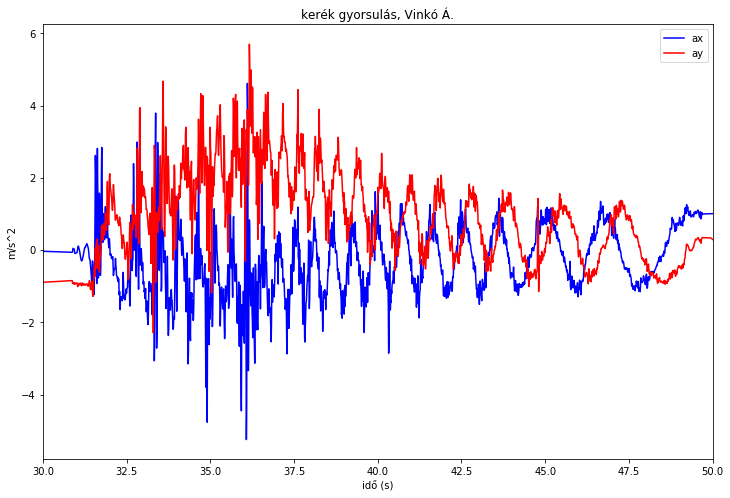

In [3]:
aint = np.loadtxt('aint.dat')
tint= aint[:,0]
axi = aint[:,1]
ayi = aint[:,2]
n = len(tint)
dt = 0.01

xlim = [30,50]
plt.figure(figsize=(12, 8))
plt.plot(tint, axi, label='ax', color='b')
plt.plot(tint, ayi, label='ay', color='r')
plt.xlim(xlim[:])
plt.xlabel('idő (s)')
plt.ylabel('m/s^2')
plt.title('kerék gyorsulás, Vinkó Á.')
plt.legend()
plt.show()

Végezzük el az adatok 8 pontos mozgóátlag szűrését és rajzoljuk fel a szűrés eredményét

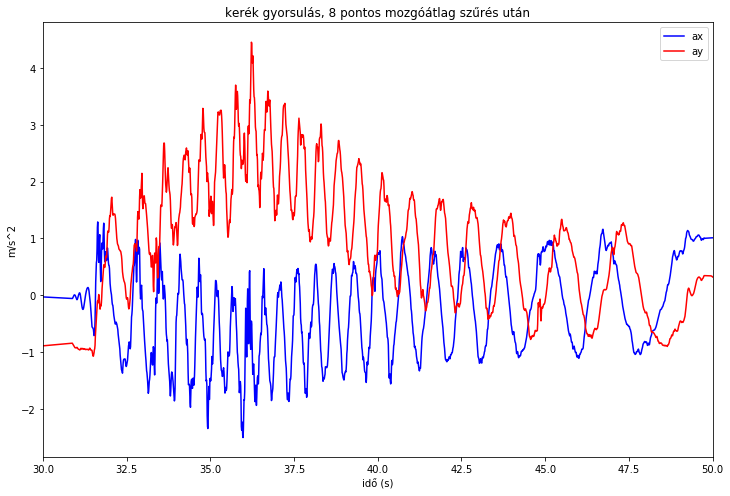

In [4]:
axf = signal.lfilter(np.ones(ma_length)/ma_length,1,axi)
ayf = signal.lfilter(np.ones(ma_length)/ma_length,1,ayi)

plt.figure(figsize=(12, 8))
plt.plot(tint, axf, label='ax', color='b')
plt.plot(tint, ayf, label='ay', color='r')
plt.xlim(xlim[:])
plt.xlabel('idő (s)')
plt.ylabel('m/s^2')
plt.title('kerék gyorsulás, 8 pontos mozgóátlag szűrés után')
plt.legend()
plt.show()

### FIR szűrő tervezés

A `scipy.signal` moduljában található eljárásokkal igen könnyen tervezhetünk FIR szűrőket. Példaként tervezzünk egy aluláteresztő szűrőt. A [`firwin`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.firwin.html) eljárás `nyq=` paraméterével tudjuk megadni a Nyquist frekvenciát, ami a gyorsulás adatok 100 Hz-es mintavételezési frekvenciájának fele, 50 Hz. Az első paraméter a szűrő együtthatók száma, a második a levágási frekvencia. Korábban, a [wavelet szűrésnél](https://nbviewer.jupyter.org/github/gyulat/Wavelet/blob/master/CWT_filter.ipynb) már láttuk, hogy a kerék csúszás nélküli forgásának a kb. 4 Hz-nél nagyobb frekvenciájú jel összetevők felelnek meg, ezért legyen a szűrő levágási frekvenciája 4 Hz.

In [5]:
a = signal.firwin(61, cutoff = 4, window = "hamming", nyq = 50)

Rajzoljuk fel a szűrő frekvencia, fázis, impulzus és lépcsős válasz függvényeit.

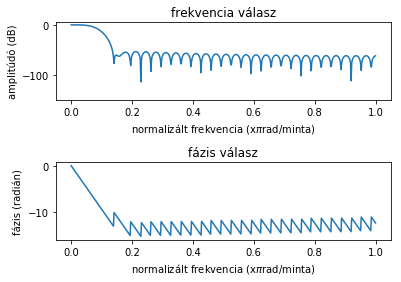

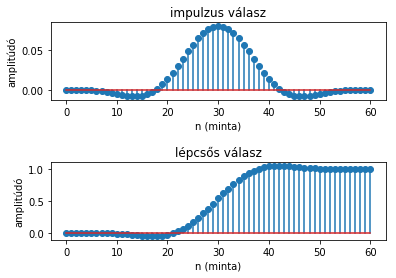

In [6]:
#frekvencia és fázis válasz
def mfreqz(b,a=1):
    w,h = signal.freqz(b,a)
    h_dB = 20 * np.log10 (abs(h))
    plt.subplot(211)
    plt.plot(w/max(w),h_dB)
    plt.ylim(-150, 5)
    plt.ylabel('amplitúdó (dB)')
    plt.xlabel(r'normalizált frekvencia (x$\pi$rad/minta)')
    plt.title(r'frekvencia válasz')
    plt.subplot(212)
    h_Phase = np.unwrap(np.arctan2(np.imag(h),np.real(h)))
    plt.plot(w/max(w),h_Phase)
    plt.ylabel('fázis (radián)')
    plt.xlabel(r'normalizált frekvencia (x$\pi$rad/minta)')
    plt.title(r'fázis válasz')
    plt.subplots_adjust(hspace=0.8)

mfreqz(a)
plt.show()

#impulzus és lépcsős válasz
def impz(b,a=1):
    l = len(b)
    impulse = np.repeat(0.,l); impulse[0] =1.
    x = np.arange(0,l)
    response = signal.lfilter(b,a,impulse)
    plt.subplot(211)
    plt.stem(x, response)
    plt.ylabel('amplitúdó')
    plt.xlabel(r'n (minta)')
    plt.title(r'impulzus válasz')
    plt.subplot(212)
    step = np.cumsum(response)
    plt.stem(x, step)
    plt.ylabel('amplitúdó')
    plt.xlabel(r'n (minta)')
    plt.title(r'lépcsős válasz')
    plt.subplots_adjust(hspace=0.8)

plt.figure(2)
impz(a)
plt.show()

Végezzük el a szűrést és rajzoljuk fel a kapott eredményt.

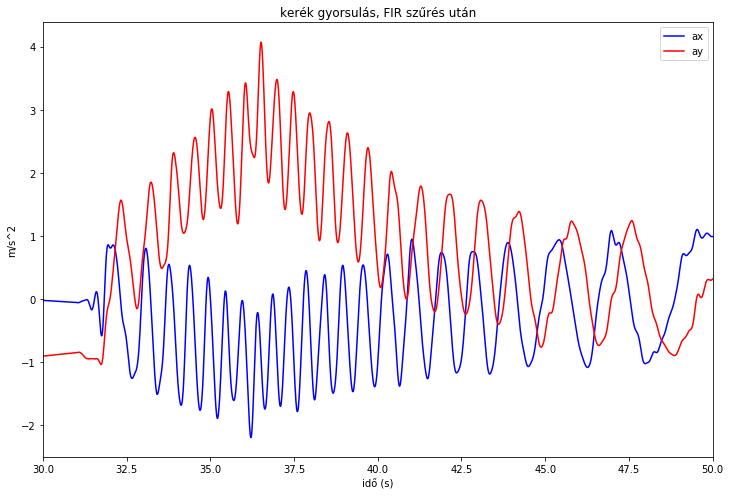

In [7]:
axf1 = signal.lfilter(a,1,axi)
ayf1 = signal.lfilter(a,1,ayi)

plt.figure(figsize=(12, 8))
plt.plot(tint, axf1, label='ax', color='b')
plt.plot(tint, ayf1, label='ay', color='r')
plt.xlim(xlim[:])
plt.xlabel('idő (s)')
plt.ylabel('m/s^2')
plt.title('kerék gyorsulás, FIR szűrés után')
plt.legend()
plt.show()

A gyorsulás adatok wavelet térképéről az is látszott, hogy a 0.10 - 0.04 s közötti periódus tartományban jelentkeztek a kerék csúszás miatti tranziensek. Tervezzük sáváteresztő FIR szűrőt erre a 10 - 25 Hz-es tartományra és végezzük el az adatok szűrését.

A sáváteresztő szűrőt úgy hozzuk létre, hogy egy megfelelő alul- és felüláteresztő szűrőt kombinálunk egymással.

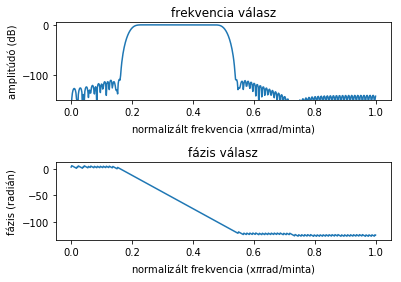

In [8]:
n = 201
#Aluláteresztő szűrő
a = signal.firwin(n, cutoff = 10, window = 'blackmanharris', nyq = 50)
#Felüláteresztő szűrő spektrális inverzióval
b = - signal.firwin(n, cutoff = 25, window = 'blackmanharris', nyq = 50); b[n//2] = b[n//2] + 1
#Kombináljuk sáváteresztő szűrővé
d = - (a+b); d[n//2] = d[n//2] + 1
#Frekvencia válasz
mfreqz(d)
plt.show()

Szűrjük az adatokat ezzel a sáváteresztő szűrővel és nézzük meg az eredményt.

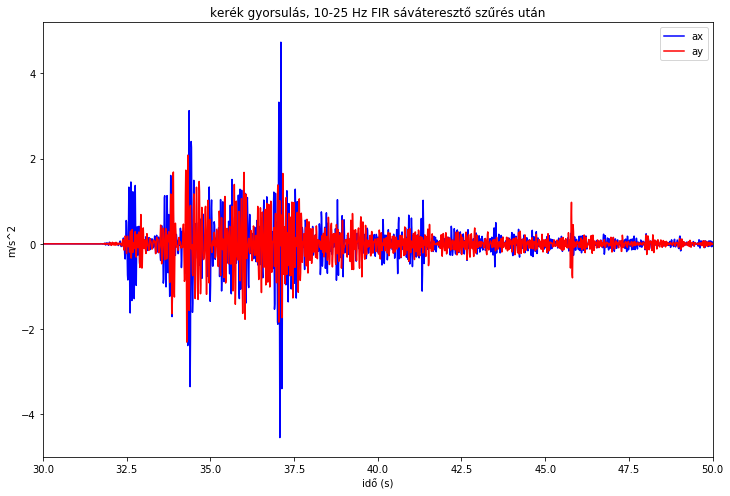

In [9]:
axf = signal.lfilter(d,1,axi)
ayf = signal.lfilter(d,1,ayi)

plt.figure(figsize=(12, 8))
plt.plot(tint, axf, label='ax', color='b')
plt.plot(tint, ayf, label='ay', color='r')
plt.xlim(xlim[:])
plt.xlabel('idő (s)')
plt.ylabel('m/s^2')
plt.title('kerék gyorsulás, 10-25 Hz FIR sáváteresztő szűrés után')
plt.legend()
plt.show()

A kerék megcsúszások (különösen az $a_x$ komponensben) ismét láthatók, bár jóval kevésbé tisztán, mint a wavelet szűrés esetében.

## Végelen impulzusválasz (IIR) szűrők

Az IIR szűrők esetében a szűrő kimenetét visszacsatoljuk a bemenetre, és ezzel a rekurziós eljárással végtelen hosszúságú impulzus választ tudunk létrehozni. A szűrő egyenlete az $x$ bemenet és $y$ kimenet között teremt kapcsolatot:

$$ y[n]=a_0 x[n] + a_1 x[n-1] + a_2 x[n-2] + ... + b_1 y[n-1] + b_2 y[n-2] + ... ,$$

ahol $a_0$, $a_1$, $a_2$, ..., $b_1$, $b_2$, ... a szűrő együtthatók. Az ún. *egypólusú* szűrő esetében csak az $a_0$, $a_1$ és $b_1$ együtthatók nem zérusok. Ezek szűrő egyenlete tehát

$$ y[n]=a_0 x[n] + a_1 x[n-1] + b_1 y[n-1].$$

A rekurziós szűrőket a *z-transzformáció* segítségével lehet igazán megérteni. Ezért a következőkben ezzel foglalkozunk.

## A z-transzformáció

Egy $x[k]$ diszkrét sorozat *z-transzformált*ja

$$ X(z)=\sum_{n=-\infty}^{\infty} x[n] z^{-n} .$$

A $z$ komplex változó tartománya két poláris változóval, $r$-el és $\omega$-val adható meg:

$$ z = re^{-j\omega}.$$

Az IIR szűrő z-transzformáltját úgy kapjuk meg, hogy a szűrő egyenletének mindkét oldalát transzformáljuk. Az $x[]$  és $y[]$ z-transzformáltjait elosztva egymással megkapjuk a rendszer *átviteli függvény*ét:

$$ H(z) = \frac{Y(z)}{X(z)} = \frac{a_0+a_1 z^{-1}+a_2 z^{-2}+a_3 z^{-3}+ ...}{1-b_1 z^{-1}-b_2 z^{-2}-b_3 z^{-3}- ...}.$$

Jól látható, hogy a szűrő együtthatókból az átviteli függvény kiszámítható. Az adott szűrő esetében az $a_k$ ill. $b_k$ együtthatók száma a szűrő *rendje*. Ha a szűrő rendjének megfelelő $z$ hatvánnyal beszorozzuk a tört számlálóját és nevezőjét, akkor az ott szereplő polinomokat gyöktényezős alakban felírva

$$ H(z) = \frac{Y(z)}{X(z)} = \frac{(z-z_1)(z-z_2)(z-z_3)\cdots}{(z-p_1)(z-p_2)(z-p_3)\cdots}$$

kapjuk, ahol $z_1$, $z_2$, $z_3$, ... a *zérusok*, $p_1$, $p_2$, $p_3$, ... pedig a *pólusok*. 

A $H(z)$ függvény komplex, de az abszolút értéke, $|H(z)|$ jól személtethető egy térbeli ábrán, hiszen a komplex *z-síkban* egy felületet határoz meg. A zérusokban a függvény értéke zérus, a pólusokban pedig végtelen. Példaként rajzoljuk fel a 

$$ H(z)=\frac{1-z^{-2}}{1+0.7725z^{-2}} = \frac{(z+1)(z-1)}{(z+0.85i)(z-0.85i)}$$

átviteli függvény abszolút értékét. A zérusokat kék körök, a pólusokat piros x-ek jelölik.

![átviteli függvény](Hz.png "átviteli függvény")

Az IIR szűrő frekvencia válaszát a z-sík egységköre mentén kiszámított függvény értékek (az ábrán piros szaggatott vonal) adják meg. Az ![pz-ábra](pzplot.png "Pólus-zérus ábra az egységkörrel") az (1,0) pontban van a zérus frekvencia, a (-1,0) pontban pedig a Nyquist frekvencia (a mintavételi frekvencia fele). Mivel az átviteli függvény szimmetrikus a valós tengelyre, ezért elég a felső félsíkba eső részével foglalkozni.

Rajzoljuk fel az említett szűrő frekvencia és fázis válasz függvényeit! A szűrő együtthatói $a_0 = 1$, $a_1=0$, $a_2=-1$, $b_1=0$, $b_2=0.7225$.

/home/tg/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.


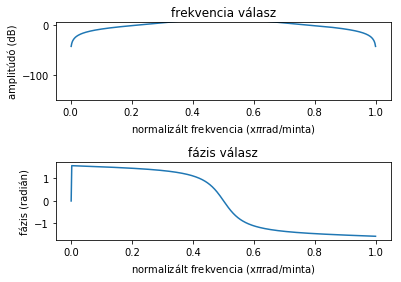

In [10]:
mfreqz([1.0,0.0,-1.0],[1.0,0.0,0.7225])
plt.show()

Jól látszik, hogy a szűrő sáváteresztő, és fázis válasza nem lineáris. A nem lineáris fázis válasz egyébként jellemző az IIR szűrőkre, szemben az FIR szűrőkkel, melyek lineáris fázis válasszal rendelkeznek.

A `scipy.signal` modul két eljárást tartalmaz az IIR szűrők tervezésére: [iirdesign](http://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.iirdesign.html) és [iirfilter](http://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.iirfilter.html). Tervezzünk Csebisev II típusú IIR szűrőt 4 Hz-es levágási frekvenciával az `iirfilter` eljárással.

In [11]:
b, a = signal.iirfilter(17, 4.0/50.0, rs=60, btype='lowpass', ftype='cheby2')

A szűrő 17-ed rendű és legalább 60 dB-es elnyomással rendelkezik a vágási sávban. Kirajzoltatjuk a frekvencia és fázis válasz függvényét.

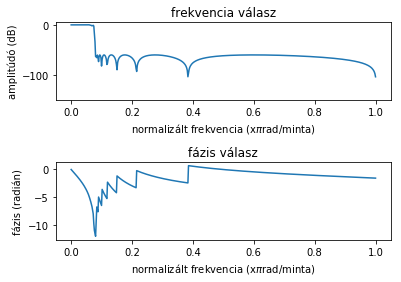

In [12]:
mfreqz(b,a)
plt.show()

Nézzük meg ezzel a szűrővel is a kerék gyorsulás adatok szűrését.

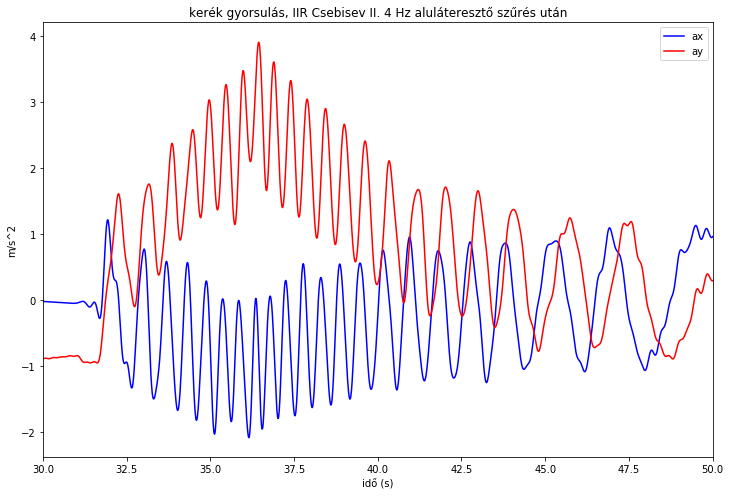

In [13]:
axf = signal.lfilter(b,a,axi)
ayf = signal.lfilter(b,a,ayi)

plt.figure(figsize=(12, 8))
plt.plot(tint, axf, label='ax', color='b')
plt.plot(tint, ayf, label='ay', color='r')
plt.xlim(xlim[:])
plt.xlabel('idő (s)')
plt.ylabel('m/s^2')
plt.title('kerék gyorsulás, IIR Csebisev II. 4 Hz aluláteresztő szűrés után')
plt.legend()
plt.show()

Végül pedig nézzük meg a FIR és IIR szűrés eredményeinek az eltérését.

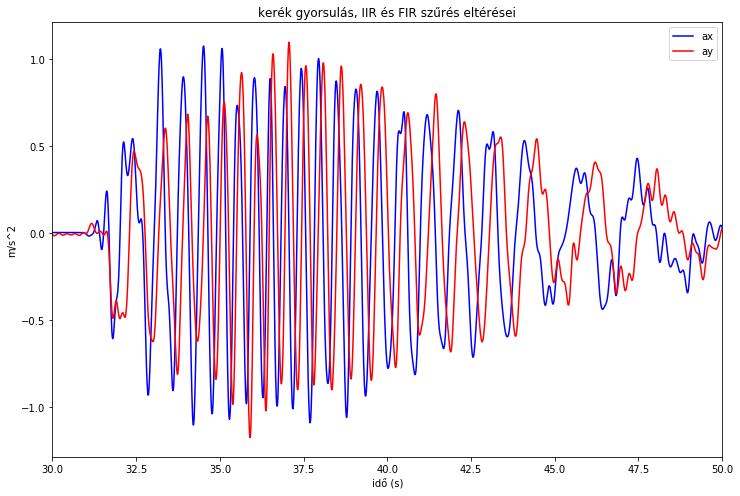

In [14]:
plt.figure(figsize=(12, 8))
plt.plot(tint, axf1-axf, label='ax', color='b')
plt.plot(tint, ayf1-ayf, label='ay', color='r')
plt.xlim(xlim[:])
plt.xlabel('idő (s)')
plt.ylabel('m/s^2')
plt.title('kerék gyorsulás, IIR és FIR szűrés eltérései')
plt.legend()
plt.show()

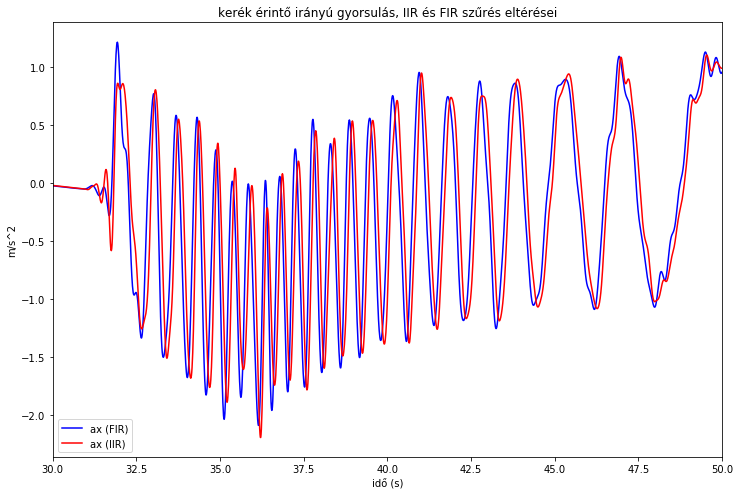

In [15]:
plt.figure(figsize=(12, 8))
plt.plot(tint, axf, label='ax (FIR)', color='b')
plt.plot(tint, axf1, label='ax (IIR)', color='r')
plt.xlim(xlim[:])
plt.xlabel('idő (s)')
plt.ylabel('m/s^2')
plt.title('kerék érintő irányú gyorsulás, IIR és FIR szűrés eltérései')
plt.legend()
plt.show()

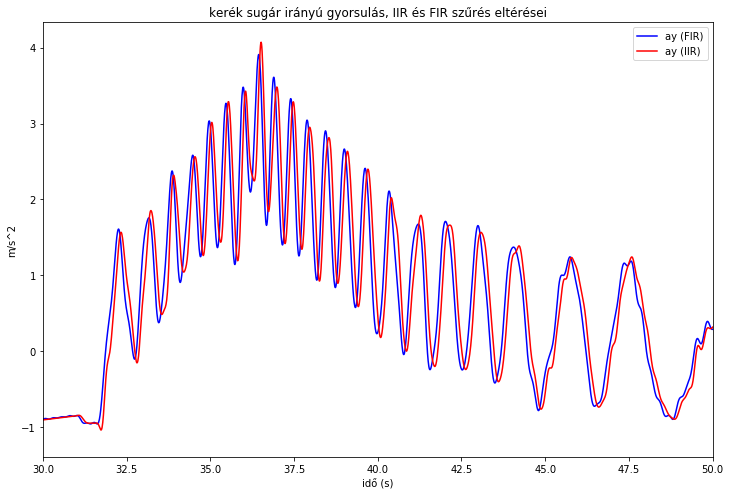

In [16]:
plt.figure(figsize=(12, 8))
plt.plot(tint, ayf, label='ay (FIR)', color='b')
plt.plot(tint, ayf1, label='ay (IIR)', color='r')
plt.xlim(xlim[:])
plt.xlabel('idő (s)')
plt.ylabel('m/s^2')
plt.title('kerék sugár irányú gyorsulás, IIR és FIR szűrés eltérései')
plt.legend()
plt.show()

Jól látható az, hogy az IIR szűrő nem lineáris fázis átvitele miatt a szűrt jelek fázisai megváltoztak, ami a görbék eltolódásában jelentkezik. Ezért ahol a fázis információ lényeges, ott igen fontos lineáris fázis átvitelű szűrőket használni.

Meghatározhatjuk a fázis eltolódást a keresztkorreláció függvény maximumát megkeresve.

In [17]:
from scipy.signal import correlate

nsamples = axf.size

# normalizáljuk az adatsor átlagára és szórására
#axf -= axf.mean(); axf /= axf.std()
#axf1 -= axf1.mean(); axf1 /= axf1.std()

# keresztkorrelációt számítunk
xcorr = correlate(axf1, axf)

# delta_t tömb
dtt = np.arange(1-nsamples, nsamples)

ido_eltolas = dtt[xcorr.argmax()]

print ("kiszámított eltolás: %d" % (ido_eltolas))

kiszámított eltolás: 8


Megemlítjük, hogy a Matlab grafikus szűrőtervező eszközéhez, az `fdatool`-hoz hasonló eszköz (bár még szerényebb funkcionalitással) elérhető Python alá is. Ez a `pyFDA`, amelyet le lehet tölteni Christian Münker GitHub [oldaláról](https://github.com/chipmuenk/pyFDA). Az alábbi ábrán ezt a grafikus eszközt láthatjuk. ![pyFDA](pyFDA.png "Python grafikus szűrő tervező eszköz")